<a href="https://colab.research.google.com/github/gogilans/MSCI-546-Final-Project-/blob/main/Project_Proposal_(Logistic_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

**Read Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
import io
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))

**Exploratory Analysis**
- To help determine which features are most relavant to help determine survival of passengers 

0    549
1    342
Name: Survived, dtype: int64


<AxesSubplot:>

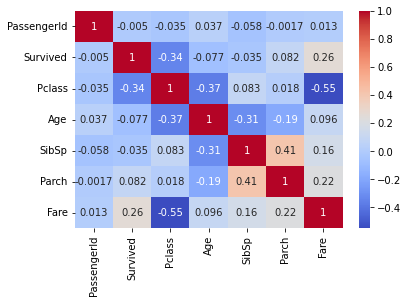

In [ ]:
# Checking the distribution of target variable
print(train['Survived'].value_counts())

# Checking the correlation between numerical variables
corr_matrix = train.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

**Data Analysis** 
- Graphs to see an analysis between features and output variable

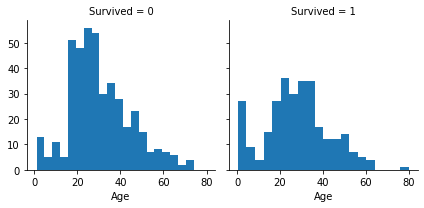

In [ ]:
#plotting age distribution
age_distribution=sns.FacetGrid(train,col='Survived')
age_distribution.map(plt.hist, 'Age', bins=20)

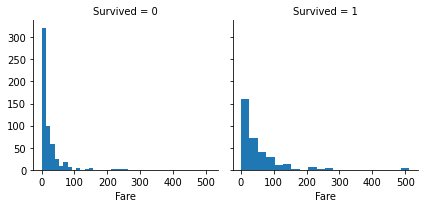

In [ ]:
#plotting distribution of fare
fare_distribution=sns.FacetGrid(train,col='Survived')
fare_distribution.map(plt.hist, 'Fare', bins=20)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


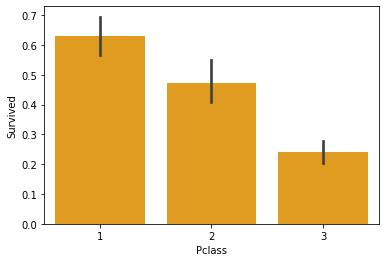

In [ ]:
#plotting distribution of PClass values
sns.barplot('Pclass', 'Survived', data=train, color="orange")
plt.show()

<AxesSubplot:xlabel='Sex'>

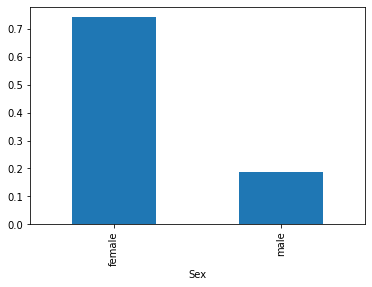

In [ ]:
#intuition to see which gender has more chance of survival
train.groupby('Sex').Survived.mean().plot(kind='bar')

#Overall, it's seen that we have a good rate of survival between females

<AxesSubplot:xlabel='Age'>

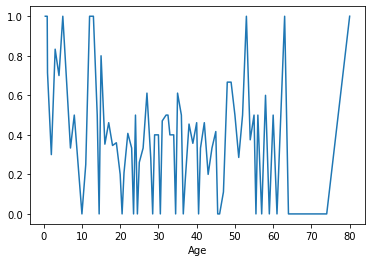

In [ ]:
#intuition to see which age range has more chance of survival
train.groupby('Age').Survived.mean().plot(kind='line')

#Overall, it's seen that we have a good rate of survival between children

<AxesSubplot:xlabel='Pclass'>

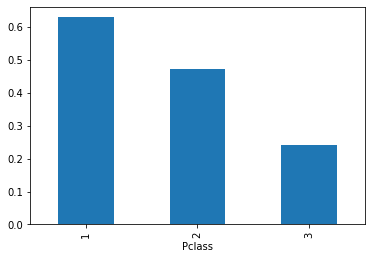

In [ ]:
#intuition to see which Pclass range has more chance of survival
train.groupby('Pclass').Survived.mean().plot(kind='bar')

#Overall, it's seen that we have a good rate of survival between members in Pclass 1

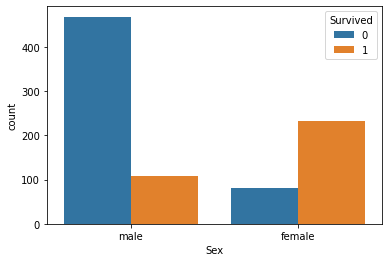

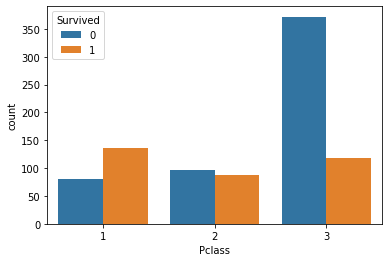

In [ ]:
# Checking the distribution of categorical variables
cat_cols = ['Sex', 'Pclass']
for col in cat_cols:
    sns.countplot(data=train, x=col, hue='Survived')
    plt.show()

**Data Pre-Processing**
- Replace NA values in dataset with mean value instead of 0

In [ ]:
train['FirstClass'] = (train['Pclass'] == 1).astype('int64')

# Transforming the Sex into 0 and 1
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1}).astype(int)

# Rounding the Age
train['Age'].fillna(train['Age'].mean(), inplace = True)

y=train['Survived']
x=train[['Pclass','Age','Sex','Fare']]

**Logistic Regression**
- Run the model and calculate accuracy

In [ ]:
#split into 70/30 split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=0)
model=LogisticRegression()
model.fit(x_train,y_train)
y_prediction=model.predict_proba(x_test)
print('Accuracy: ')
print(log_loss(y_test,y_prediction))


Accuracy: 
0.4405124943983475
